# Domain –Social Media FOCUS –PREDICT NO.OF SHARES OF AN ARTICLE

In [1]:
import os
os.chdir(r'c:\Users\Sunita\Project_1')

In [179]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

In [180]:
# Load the dataset and read
data = pd.read_csv('OnlineNewsPopularity.csv')
data.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [181]:
# Dataset relation, description and info
data.describe()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,...,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000
mean,354.530471,10.398749,546.514731,0.548216,0.996469,0.689175,10.883690,3.293638,4.544143,1.249874,...,0.095446,0.756728,-0.259524,-0.521944,-0.107500,0.282353,0.071425,0.341843,0.156064,3395.380184
std,214.163767,2.114037,471.107508,3.520708,5.231231,3.264816,11.332017,3.855141,8.309434,4.107855,...,0.071315,0.247786,0.127726,0.290290,0.095373,0.324247,0.265450,0.188791,0.226294,11626.950749
min,8.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,1.000000
25%,164.000000,9.000000,246.000000,0.470870,1.000000,0.625739,4.000000,1.000000,1.000000,0.000000,...,0.050000,0.600000,-0.328383,-0.700000,-0.125000,0.000000,0.000000,0.166667,0.000000,946.000000
50%,339.000000,10.000000,409.000000,0.539226,1.000000,0.690476,8.000000,3.000000,1.000000,0.000000,...,0.100000,0.800000,-0.253333,-0.500000,-0.100000,0.150000,0.000000,0.500000,0.000000,1400.000000
75%,542.000000,12.000000,716.000000,0.608696,1.000000,0.754630,14.000000,4.000000,4.000000,1.000000,...,0.100000,1.000000,-0.186905,-0.300000,-0.050000,0.500000,0.150000,0.500000,0.250000,2800.000000
max,731.000000,23.000000,8474.000000,701.000000,1042.000000,650.000000,304.000000,116.000000,128.000000,91.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.500000,1.000000,843300.000000


In [182]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 61 columns):
url                               39644 non-null object
timedelta                         39644 non-null float64
n_tokens_title                    39644 non-null float64
n_tokens_content                  39644 non-null float64
n_unique_tokens                   39644 non-null float64
n_non_stop_words                  39644 non-null float64
n_non_stop_unique_tokens          39644 non-null float64
num_hrefs                         39644 non-null float64
num_self_hrefs                    39644 non-null float64
num_imgs                          39644 non-null float64
num_videos                        39644 non-null float64
average_token_length              39644 non-null float64
num_keywords                      39644 non-null float64
data_channel_is_lifestyle         39644 non-null float64
 data_channel_is_entertainment    39644 non-null float64
data_channel_is_bus               396

# Performing Exploratory Data Analysis on dataset

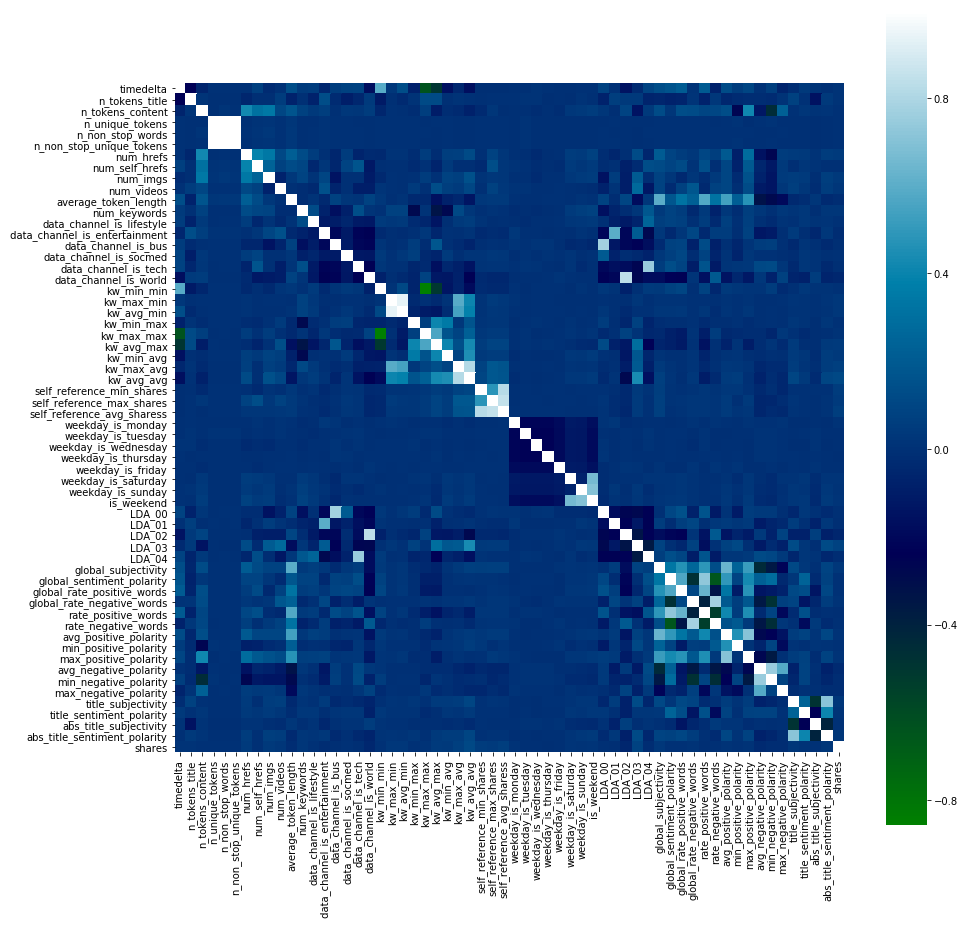

In [183]:
#Co-relation matrix
corelation = data.corr()
plt.figure(figsize=(15,15))
sn.heatmap(corelation,cmap='ocean',square=True)

In [184]:
# Eliminating the first 2 columns and the target columns

data_x = data.drop(['url', data.columns[1], data.columns[-1]], axis=1)
data_x.head()

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity
0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,4.680365,...,0.378636,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500
1,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,4.913725,...,0.286915,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000
2,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,4.393365,...,0.495833,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000
3,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,4.404896,...,0.385965,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000
4,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,4.682836,...,0.411127,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364


In [185]:
# Select the weekdays to plot the count of popularity and unpopularity article

print(data_x.columns[29:36])
days = data_x.columns[29:36]

Index(['weekday_is_monday', 'weekday_is_tuesday', 'weekday_is_wednesday',
       'weekday_is_thursday', 'weekday_is_friday', 'weekday_is_saturday',
       'weekday_is_sunday'],
      dtype='object')


In [186]:
# Seperating popular & unpopular on basis of shares count

unpopular = data[data['shares']<1400]
popular = data[data['shares']>=1400]

In [187]:
# Popular days & Unpopular days

p_days = popular[days].sum().values
up_days = unpopular[days].sum().values

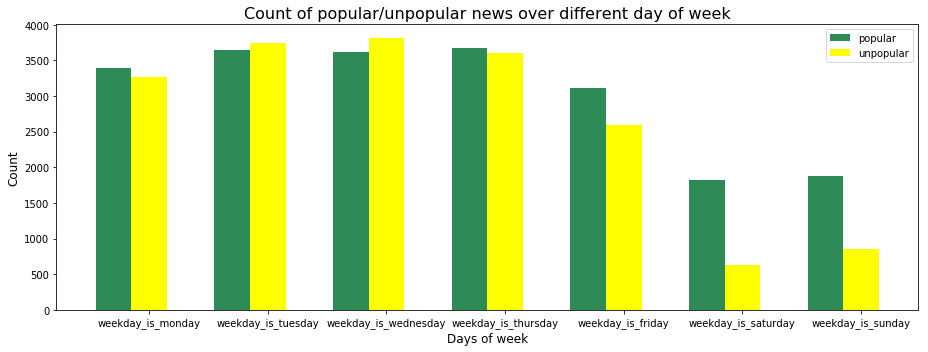

In [188]:
# Plot of Count of popular/unpopular news over different day of week

plt.figure(figsize = (13,5))
plt.title("Count of popular/unpopular news over different day of week", fontsize = 16)
plt.bar(np.arange(len(days))-0.3, p_days, width = 0.3, align = "center", color = 'seagreen', label = "popular")
plt.bar(np.arange(len(days)), up_days, width = 0.3, align="center", color = 'yellow', label = "unpopular")
plt.xticks(np.arange(len(days)), days)
plt.ylabel("Count", fontsize = 12)
plt.xlabel("Days of week", fontsize = 12)
    
plt.legend(loc = 'upper right')
plt.tight_layout()
plt.show()

In [189]:
# Select the channels to plot the count of popularity and unpopularity article

print(data_x.columns[11:17])
channels = data_x.columns[11:17]

Index(['data_channel_is_lifestyle', ' data_channel_is_entertainment',
       'data_channel_is_bus', 'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world'],
      dtype='object')


In [190]:
# Seperating popular & unpopular on basis of shares count for channels

unpopular_ch = data[data['shares']<1400]
popular_ch = data[data['shares']>=1400]

In [191]:
# Popular days & Unpopular channels

p_channel = popular_ch[channels].sum().values
un_channel = unpopular_ch[channels].sum().values

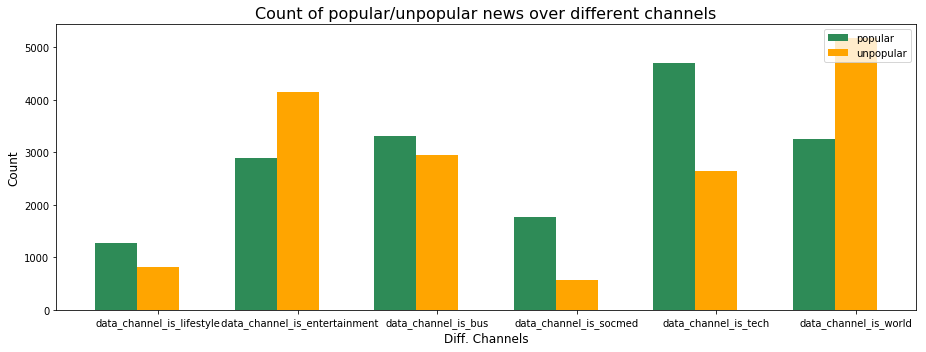

In [192]:
# Plot of Count of popular/unpopular news over different day of week

plt.figure(figsize = (13,5))
plt.title("Count of popular/unpopular news over different channels", fontsize = 16)
plt.bar(np.arange(len(channels))-0.3, p_channel, width = 0.3, align = "center", color = 'seagreen', label = "popular")
plt.bar(np.arange(len(channels)), un_channel, width = 0.3, align="center", color = 'orange', label = "unpopular")
plt.xticks(np.arange(len(channels)), channels)
plt.ylabel("Count", fontsize = 12)
plt.xlabel("Diff. Channels", fontsize = 12)
    
plt.legend(loc = 'upper right')
plt.tight_layout()
plt.show()

In [193]:
# Selecting sum of 0-10 no.s of Images shared in an article  

img = []
for i in data['num_imgs'].unique():
    img.append(i)
    
img.sort()
num_img = img[0:11]

In [194]:
# Finding sum of images ranging 0-11, i.e 10
# Storing the sum in img_share

img_share = []
for j in num_img:
    total = 0
    for s in data[data['num_imgs']==j]['shares']:
        total += s
    img_share.append(total)

Text(0.5,1,'Images shared in an Article')

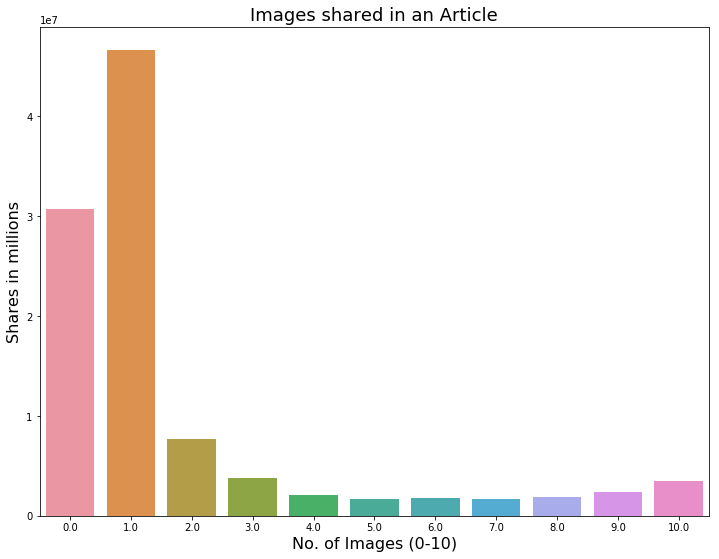

In [195]:
# Plot of Images shared in an Article 

plt.figure(figsize=(12,9))
sns.barplot(num_img, img_share)
plt.xlabel('No. of Images (0-10)', size=16)
plt.ylabel('Shares in millions', size=16)
plt.title('Images shared in an Article', size=18)

In [196]:
# Selecting sum of 0-10 no.s of Images shared in an article  

data['num_videos'].unique()

video = []
for i in data['num_videos'].unique():
    video.append(i)
    
video.sort()
num_video = video[0:11]
num_video

[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0]

In [197]:
# Finding sum of images ranging 0-11, i.e 10
# Storing the sum in img_share

video_share = []
for j in num_video:
    total = 0
    for s in data[data['num_videos']==j]['shares']:
        total += s
    video_share.append(total)

Text(0.5,1,'Videos shared in an Article')

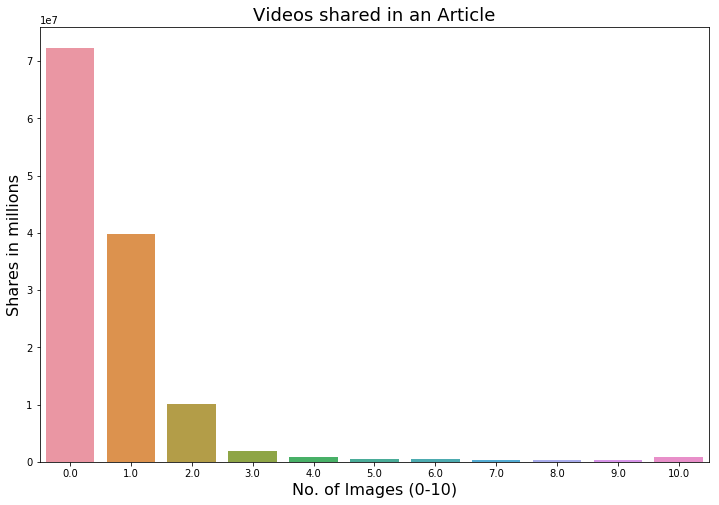

In [198]:
# Plot of Videos shared in an Article

plt.figure(figsize=(12,8))
sns.barplot(num_video, video_share)
plt.xlabel('No. of Images (0-10)', size=16)
plt.ylabel('Shares in millions', size=16)
plt.title('Videos shared in an Article', size=18)

In [199]:

popular=data.shares>=1400
unpopular=data.shares<1400
data.loc[popular,'shares']=1
data.loc[unpopular,'shares']=0

# Applying np.log() method to calculate the natural logarithmic value of the data values of array values

In [200]:
cols1=["data_channel_is_lifestyle","data_channel_is_entertainment","data_channel_is_bus",
      "data_channel_is_socmed","data_channel_is_tech","data_channel_is_world",
     "weekday_is_monday","weekday_is_tuesday","weekday_is_wednesday","weekday_is_thursday","weekday_is_friday",
     "weekday_is_saturday","weekday_is_sunday"]

In [201]:
cols2=["global_subjectivity","rate_positive_words","rate_negative_words",
     "avg_positive_polarity","min_positive_polarity","max_positive_polarity","avg_negative_polarity","min_negative_polarity",
     "max_negative_polarity","title_subjectivity","abs_title_sentiment_polarity"]

In [202]:
cols3= ["url","timedelta","shares"]

In [203]:

for i in data.columns:
    if i not in cols1 and i not in cols2 and i not in cols3:
        data[i]=np.log(1.001+data[i])

data.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,2.565026,5.393632,0.509582,0.693647,0.596848,1.609638,1.098946,0.693647,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.206409,0.001000,0.187500,0
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,2.302685,5.545181,0.473587,0.693647,0.583860,1.386544,0.693647,0.693647,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.001000,0.406132,0.000000,0
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,2.302685,5.356591,0.454972,0.693647,0.509744,1.386544,0.693647,0.693647,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.001000,0.406132,0.000000,1
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,2.302685,6.276645,0.408652,0.693647,0.510806,2.302685,0.001000,0.693647,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.001000,0.406132,0.000000,0
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,2.639129,6.978215,0.348292,0.693647,0.433009,2.995782,2.995782,3.044570,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.128713,0.045408,0.136364,0


In [204]:

# Features of the given dataset

features=list(data.columns[2:60])
X = data[features]
X

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity
0,2.565026,5.393632,0.509582,0.693647,0.596848,1.609638,1.098946,0.693647,0.001000,1.737192,...,0.378636,0.100000,0.700000,-0.350000,-0.600000,-0.200000,0.500000,-0.206409,0.001000,0.187500
1,2.302685,5.545181,0.473587,0.693647,0.583860,1.386544,0.693647,0.693647,0.001000,1.777445,...,0.286915,0.033333,0.700000,-0.118750,-0.125000,-0.100000,0.000000,0.001000,0.406132,0.000000
2,2.302685,5.356591,0.454972,0.693647,0.509744,1.386544,0.693647,0.693647,0.001000,1.685355,...,0.495833,0.100000,1.000000,-0.466667,-0.800000,-0.133333,0.000000,0.001000,0.406132,0.000000
3,2.302685,6.276645,0.408652,0.693647,0.510806,2.302685,0.001000,0.693647,0.001000,1.687490,...,0.385965,0.136364,0.800000,-0.369697,-0.600000,-0.166667,0.000000,0.001000,0.406132,0.000000
4,2.639129,6.978215,0.348292,0.693647,0.433009,2.995782,2.995782,3.044570,0.001000,1.737626,...,0.411127,0.033333,1.000000,-0.220192,-0.500000,-0.050000,0.454545,0.128713,0.045408,0.136364
5,2.397986,5.916205,0.445255,0.693647,0.530156,1.098946,1.098946,0.001000,0.001000,1.679050,...,0.350610,0.136364,0.600000,-0.195000,-0.400000,-0.100000,0.642857,0.194979,0.134406,0.214286
6,2.197336,6.867975,0.350067,0.693647,0.438793,3.091088,3.044570,3.044570,0.001000,1.732570,...,0.402039,0.100000,1.000000,-0.224479,-0.500000,-0.050000,0.000000,0.001000,0.406132,0.000000
7,2.565026,6.897706,0.360868,0.693647,0.453053,3.044570,3.044570,3.044570,0.001000,1.726117,...,0.427720,0.100000,1.000000,-0.242778,-0.500000,-0.050000,1.000000,0.406132,0.406132,0.500000
8,2.484990,4.584978,0.513484,0.693647,0.608534,1.098946,0.001000,0.001000,0.001000,1.767581,...,0.566667,0.400000,0.800000,-0.125000,-0.125000,-0.125000,0.125000,0.001000,0.319181,0.000000
9,2.397986,5.446742,0.493087,0.693647,0.586731,1.609638,0.693647,0.693647,0.693647,1.806962,...,0.298413,0.100000,0.500000,-0.238095,-0.500000,-0.100000,0.000000,0.001000,0.406132,0.000000


In [205]:

# Target of the given dataset

target = data['shares']
Y = target


In [206]:
# Import training dependencies

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Use sklearn.model_selection to split the data into a training set and a testing

In [207]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=0)

# Training the models

In [208]:
from sklearn.ensemble import RandomForestClassifier

clf_rf = RandomForestClassifier(n_estimators=100, n_jobs=-1)
clf_rf.fit(X_train,Y_train)
y_pred_rf = clf_rf.predict(X_test)
print("RandomForestClassifier Acuracy: ", accuracy_score(Y_test, y_pred_rf))

RandomForestClassifier Acuracy:  0.6609827464433458


# RandomForestClassifier Acuracy:  0.6631016042780749

In [209]:
from sklearn.neighbors import KNeighborsClassifier

clf_knn = KNeighborsClassifier()
clf_knn.fit(X_train,Y_train)
y_pred_knn=clf_knn.predict(X_test)
print ("KNeighborsClassifier Accuracy: ",accuracy_score(Y_test, y_pred_knn))

KNeighborsClassifier Accuracy:  0.607002320653819


In [210]:
from sklearn.tree import DecisionTreeClassifier

clf_dt = DecisionTreeClassifier()
clf_dt.fit(X_train,Y_train)
y_pred_dt=clf_dt.predict(X_test)
print ("DecisionTreeClassifier Accuracy: ",accuracy_score(Y_test, y_pred_dt))

DecisionTreeClassifier Accuracy:  0.5800625567551205


In [211]:

# RMSE Value is very less that means the model is very good.
from sklearn import metrics
print(np.sqrt(metrics.mean_absolute_error(y_pred_rf,Y_test)).round(7))

0.5822519


In [212]:

# R2 value 
print(metrics.r2_score(Y_test,y_pred_rf))


-0.36081006156405104
